In [4]:
import os
import pandas as pd
articles_path = r"C:/Users/kamsa/cds522/BBC News Summary/BBC News Summary/News Articles/"

In [5]:
data = []
for topic in os.listdir(articles_path):
    topic_path = os.path.join(articles_path, topic)
    for file_path in os.listdir(topic_path):
        try:
            with open(f'{topic_path}/{file_path}', 'r') as f:
                data.append((f.read(), topic_path.split('/')[-1]))
        except UnicodeDecodeError:
            print(f'file {file_path} in {topic_path} is not readable')

In [6]:
df = pd.DataFrame(data, columns=['Text', 'label'])

In [7]:
df.rename(columns={'Text': 'text'}, inplace=True)

In [8]:
df

,text,label
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business
...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,tech
2221,Spam e-mails tempt net shoppers\n\nComputer us...,tech
2222,Be careful how you code\n\nA new European dire...,tech
2223,US cyber security chief resigns\n\nThe man mak...,tech


In [9]:
df['text'] = df['text'].str.replace('\n', ' ')

In [10]:
df

,text,label
0,Ad sales boost Time Warner profit Quarterly p...,business
1,Dollar gains on Greenspan speech The dollar h...,business
2,Yukos unit buyer faces loan claim The owners ...,business
3,High fuel prices hit BA's profits British Air...,business
4,Pernod takeover talk lifts Domecq Shares in U...,business
...,...,...
2220,BT program to beat dialler scams BT is introd...,tech
2221,Spam e-mails tempt net shoppers Computer user...,tech
2222,Be careful how you code A new European direct...,tech
2223,US cyber security chief resigns The man makin...,tech


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
%matplotlib inline

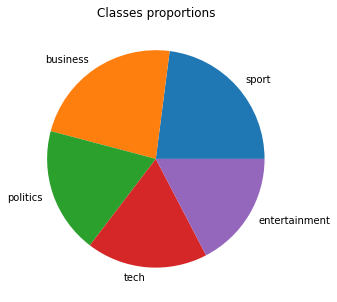

In [12]:
label_count = df['label'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(label_count.values, labels=label_count.index)
plt.title('Classes proportions')
plt.show()

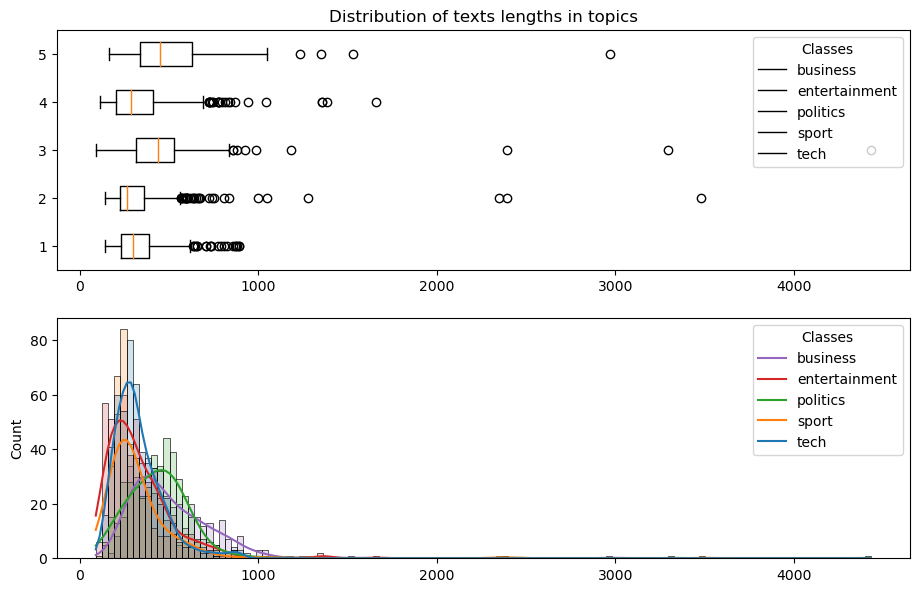

In [13]:
texts = df['text']
text_lens = [[len(t.split()) for t in texts[df['label'] == label]] for label in df['label'].unique()]

fig, axes = plt.subplots(2, 1, figsize=(11, 7), dpi=100)
axes = axes.flatten()


axes[0].boxplot(text_lens, vert=False)
sns.histplot(text_lens, ax=axes[1], alpha=0.2, palette=sns.color_palette()[:5], kde=True)

    
axes[0].legend(df['label'].unique(), title='Classes')
axes[1].legend(df['label'].unique(), title='Classes')

axes[0].set_title('Distribution of texts lengths in topics')

plt.show()

In [26]:
df['text']

0       Ad sales boost Time Warner profit  Quarterly p...
1       Dollar gains on Greenspan speech  The dollar h...
2       Yukos unit buyer faces loan claim  The owners ...
3       High fuel prices hit BA's profits  British Air...
4       Pernod takeover talk lifts Domecq  Shares in U...
                              ...                        
2220    BT program to beat dialler scams  BT is introd...
2221    Spam e-mails tempt net shoppers  Computer user...
2222    Be careful how you code  A new European direct...
2223    US cyber security chief resigns  The man makin...
2224    Losing yourself in online gaming  Online role ...
Name: text, Length: 2225, dtype: object